c:\Users\Angga\anaconda3\envs\kMeansEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Angga\anaconda3\envs\kMeansEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Angga\anaconda3\envs\kMeansEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Angga\anaconda3\envs\kMeansEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

   Jumlah Cluster  Selisih SSE
0               2   299.837686
1               3   128.686025
2               4    94.278862
3               5    72.481298
4               6    52.772500
5               7    70.338822
6               8    43.689867
7               9    33.460494
8              10    34.582029


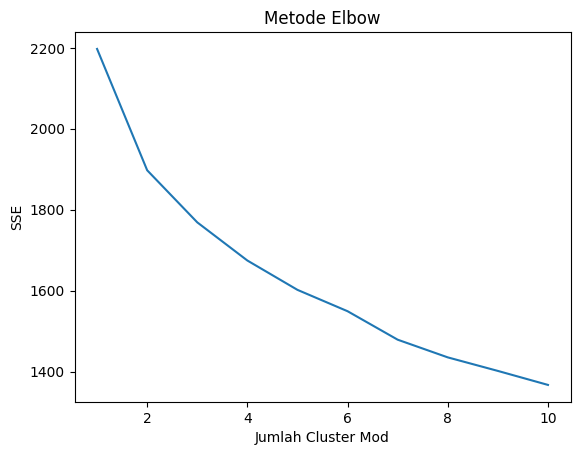

   Jumlah Cluster  Selisih SSE
0               2   299.837686
1               3   128.689058
2               4    94.275829
3               5    65.329220
4               6    57.540147
5               7    66.440569
6               8    38.342970
7               9    48.682474
8              10    27.979754


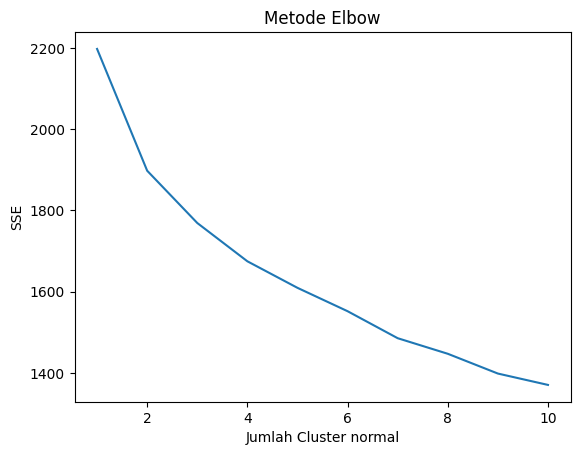

c:\Users\Angga\anaconda3\envs\kMeansEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score Normal:  0.16
Silhouette Score Mod:  0.16
Cluster 0
Cluster 1


AttributeError: 'XlsxWriter' object has no attribute 'save'

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Langkah 1: Data Preprocessing
# Membaca dataset
df = pd.read_excel("data customer.xlsx")
dfNasabah = df["NASABAH"]
dfPicRec = df["PIC Rekomendasi"]
dfTipeNasabah = df["Tipe Nasabah"]
dfGenerasi = df["GENERASI"]
dfPekerjaan = df["PEKERJAAN"]
dfLOB = df['LOB']
dfAGAMA = df['AGAMA']
# unique_pekerjaan = df["PEKERJAAN"].unique()
# unique_lob = df['LOB'].unique()
# unique_agama = df["AGAMA"].unique()

# drop kolom yang tidak digunakan
df = df.drop(
    [
        "NASABAH",
        "PIC 2",
        "Prio/Soli",
        "Sex",
    ],
    axis=1,
)

# Daftar kolom yang ingin diproses
kolom = [
    "PEKERJAAN",
    "PIC Rekomendasi",
    "Tipe Nasabah",
    "GENERASI",
    "LOB",
    "AGAMA",
]

# Mengambil nilai unik dari setiap kolom
unique_values = {}
for col in kolom:
    unique_values[col] = df[col].unique()

# Membuat array dari nilai-nilai unik
mapping_arrays = {}
for col in kolom:
    mapping_arrays[col] = unique_values[col].tolist()

# Menggantikan setiap data dengan nomor indeks array
for col in kolom:
    df[col] = df[col].map(lambda x: mapping_arrays[col].index(x))


# Mengubah kolom "USIA" menjadi nilai usia yang sesuai
def convert_usia(usia):
    tahun, bulan = usia.split(" Thn, ")
    bulan = int(bulan.split(" Bln")[0])
    if bulan >= 6:
        tahun = int(tahun) + 1
    return int(tahun)


df["USIA"] = df["USIA"].apply(convert_usia)

# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
dataset_scaled_normal = scaler.fit_transform(df)
dataset_scaled_mod = scaler.fit_transform(df)

n_init = 10
# Find the optimal number of clusters using the Elbow method
sse_normal = []
sse_mod = []
for k in range(1, 11):
    kmeans_normal = KMeans(n_clusters=k, random_state=42)
    kmeans_normal.fit(dataset_scaled_normal)
    sse_normal.append(kmeans_normal.inertia_)
    kmeans_mod = KMeans(n_clusters=k, init="k-means++", n_init=n_init)
    kmeans_mod.fit(dataset_scaled_mod)
    sse_mod.append(kmeans_mod.inertia_)
sse_diff_normal = []
for i in range(1, len(sse_normal)):
    diff = sse_normal[i - 1] - sse_normal[i]
    sse_diff_normal.append(diff)
sse_diff_mod = []
for i in range(1, len(sse_mod)):
    diff = sse_mod[i - 1] - sse_mod[i]
    sse_diff_mod.append(diff)

# Membuat dataframe untuk tabel selisih SSE
sse_table_mod = pd.DataFrame(
    {"Jumlah Cluster": range(2, len(sse_mod) + 1), "Selisih SSE": sse_diff_mod}
)
print(sse_table_mod)
# Plot elbow curve
plt.plot(range(1, 11), sse_mod)
plt.xlabel("Jumlah Cluster Mod")
plt.ylabel("SSE")
plt.title("Metode Elbow")
plt.show()

sse_table_normal = pd.DataFrame(
    {"Jumlah Cluster": range(2, len(sse_normal) + 1), "Selisih SSE": sse_diff_normal}
)

print(sse_table_normal)
# Plot elbow curve
plt.plot(range(1, 11), sse_normal)
plt.xlabel("Jumlah Cluster normal")
plt.ylabel("SSE")
plt.title("Metode Elbow")
plt.show()


max_diff_index_mod = sse_table_mod["Selisih SSE"].idxmax()
max_diff_index_normal = sse_table_normal["Selisih SSE"].idxmax()

optimal_cluster_mod = sse_table_mod.loc[max_diff_index_mod, "Jumlah Cluster"]
optimal_cluster_normal = sse_table_normal.loc[max_diff_index_normal, "Jumlah Cluster"]


# Perform K-means clustering with the optimal number of clusters
kmeans_normal = KMeans(n_clusters=optimal_cluster_normal, random_state=32)
kmeans_mod = KMeans(n_clusters=optimal_cluster_mod, init="k-means++", n_init=n_init)
kmeans_normal.fit(dataset_scaled_normal)
kmeans_mod.fit(dataset_scaled_mod)

# Add cluster labels to the dataset
df["Cluster Normal"] = kmeans_normal.labels_
df["Cluster Mod"] = kmeans_mod.labels_
df["PEKERJAAN"] = dfPekerjaan
df['LOB'] = dfLOB
df['AGAMA'] = dfAGAMA
df['GENERASI'] = dfGenerasi
df['PIC Rekomendasi'] = dfPicRec
df['Tipe Nasabah'] = dfTipeNasabah




# Calculate silhouette score
silhouette_score_normal = silhouette_score(
    dataset_scaled_normal, kmeans_normal.labels_
).round(2)
silhouette_score_mod = silhouette_score(dataset_scaled_mod, kmeans_mod.labels_).round(2)

# Print silhouette score
print("Silhouette Score Normal: ", silhouette_score_normal)
print("Silhouette Score Mod: ", silhouette_score_mod)

# save data to excel

df.to_excel("data customer cluster.xlsx")
# Analisis data pada setiap cluster



In [25]:
contoh data seperti ini

SyntaxError: invalid syntax (2093508017.py, line 1)

In [40]:
import pandas as pd
data = pd.read_excel("data customer cluster.xlsx")

# Mengelompokkan berdasarkan Cluster
grouped_cluster = data.groupby('Cluster Normal')

# Menampilkan informasi berdasarkan Cluster
for cluster, group in grouped_cluster:
    print('\nCluster:', cluster)
    print('Jumlah Data:', len(group))
    
    # Mengelompokkan berdasarkan kategori umur
    grouped_umur = group.groupby('GENERASI')
    
    for umur, sub_group in grouped_umur:
        print('\nKategori Umur:', umur)
        print('Pekerjaan:', sub_group['PEKERJAAN'].unique())
        
        # Mendapatkan nilai maksimum dari setiap produk dan fasilitas
        max_values = sub_group[['TABUNGAN + DEPOSITO', 'GIRO', 'CREDIT CARD', 'KPR', 'AUTO', 'INVESTASI', 'PROTEKSI', 'ECHANNEL', 'PAYMENT', 'COLLECTION', 'SMART CASH', 'TRADE_FINANCE', 'KMK']].max()
        min_values = sub_group[['TABUNGAN + DEPOSITO', 'GIRO', 'CREDIT CARD', 'KPR', 'AUTO', 'INVESTASI', 'PROTEKSI', 'ECHANNEL', 'PAYMENT', 'COLLECTION', 'SMART CASH', 'TRADE_FINANCE', 'KMK']].min()
        
        # Menentukan produk yang akan digunakan berdasarkan nilai maksimum
        max_produk = max_values[max_values == max_values.max()].index
        min_produk = min_values[min_values == min_values.min()].index
        
        print('\nProduk yang Sering Digunakan:')
        for produk in max_produk:
            print('-', produk)

        print('\nProduk yang Jarang Digunakan:')
        for produk in min_produk:
            print('-', produk)




Cluster: 0
Jumlah Data: 654

Kategori Umur: BABY BOOMERS
Pekerjaan: ['WIRASWASTA' 'KARYAWAN' 'IBU R.T.' 'LAIN-LAIN' 'PROFESIONAL']

Produk yang Sering Digunakan:
- INVESTASI

Produk yang Jarang Digunakan:
- SMART CASH

Cluster: 1
Jumlah Data: 1802

Kategori Umur: GEN-X
Pekerjaan: ['KARYAWAN' 'WIRASWASTA' 'IBU R.T.' 'PROFESIONAL' 'LAIN-LAIN']

Produk yang Sering Digunakan:
- INVESTASI

Produk yang Jarang Digunakan:
- SMART CASH

Kategori Umur: GEN-Y
Pekerjaan: ['KARYAWAN' 'WIRASWASTA' 'IBU R.T.' 'PROFESIONAL' 'LAIN-LAIN' 'PELAJAR']

Produk yang Sering Digunakan:
- INVESTASI

Produk yang Jarang Digunakan:
- SMART CASH

Kategori Umur: GEN-Z
Pekerjaan: ['PELAJAR' 'KARYAWAN' 'WIRASWASTA' 'LAIN-LAIN']

Produk yang Sering Digunakan:
- INVESTASI

Produk yang Jarang Digunakan:
- SMART CASH
